In [1]:
import pandas as pd
import sklearn 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn import feature_selection
import seaborn as sns
import scipy.stats
from matplotlib import pyplot as plt
import math
import openpyxl
from  matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import xlsxwriter
from sklearn import feature_selection


In [73]:
#Fundo a ser analisado
nome_da_base = 'book_pagaya_riverview'
col_fundos = ['Pagaya Opportunity Fund','Riverview ALF']
nome_benchmark = "IBOXHY Index"

tempo = 12 #252
const = 0.03
df=pd.read_csv('P:\\ciencia_de_dados\\Correlacao_de_fundos\\Desenvolvimento\\1DataPrep\\base_'+ nome_da_base + '.csv',sep =';',index_col=0,decimal=',')

df_mensal = pd.read_csv('P:\\ciencia_de_dados\\Correlacao_de_fundos\\Desenvolvimento\\1DataPrep\\base_'+ nome_benchmark + '.csv',sep =';',index_col=0,decimal=',')

df = pd.concat([df_mensal, df])

In [3]:
df['Retorno_Positivo'] = np.where(df.Retorno>=0, 1, 0)
df['Retorno_Negativo'] = np.where(df.Retorno<0, 1, 0)


In [4]:
df_sub = df.pivot(index=["data","Ano","Mes"], columns="Product", values="Retorno_1")
df_sub = df_sub.reset_index()
df_sub = df_sub.dropna()
#df_sub = df_sub.set_index("Ano")

In [5]:
df_sub.head()

Product,data,Ano,Mes,IBOXHY Index,Pagaya Opportunity Fund,Riverview ALF
0,2018-09-28,2018,9,1.003239,1.0066,1.001200
1,2018-10-31,2018,10,0.988760,1.0078,1.006093
2,2018-11-30,2018,11,0.991570,1.0062,1.005559
3,2018-12-31,2018,12,1.020459,1.0071,1.005331
4,2019-01-31,2019,1,1.016204,1.0061,1.005008


In [7]:
#Cria a df_sub1 para calculo do tracking error 
def f(x):
    print(x.name)
    return x.div(df_sub[nome_benchmark]) #divisao entre o o retorno do fundo com o do benchmark

df_sub1 = df_sub.apply(lambda x: f(x) if x.name in col_fundos else x)

Pagaya Opportunity Fund
Riverview ALF


In [77]:
df_concat = pd.concat([df_sub, df_sub1[col_fundos].add_suffix('_spread')], axis=1, join="inner")
col_fundos = df_concat.columns[3:]
df_concat

Product,data,Ano,Mes,IBOXHY Index,Pagaya Opportunity Fund,Riverview ALF,Pagaya Opportunity Fund_spread,Riverview ALF_spread
0,2018-09-28,2018,9,1.003239,1.0066,1.001200,1.003350,0.997968
1,2018-10-31,2018,10,0.988760,1.0078,1.006093,1.019257,1.017530
2,2018-11-30,2018,11,0.991570,1.0062,1.005559,1.014754,1.014108
3,2018-12-31,2018,12,1.020459,1.0071,1.005331,0.986909,0.985176
4,2019-01-31,2019,1,1.016204,1.0061,1.005008,0.990057,0.988983
5,2019-02-28,2019,2,1.009579,1.0066,1.005961,0.997049,0.996416
6,2019-03-29,2019,3,1.012878,1.0065,1.004760,0.993703,0.991985
7,2019-04-30,2019,4,1.000463,1.0077,1.018658,1.007234,1.018187
8,2019-05-31,2019,5,1.012451,1.0054,1.007402,0.993036,0.995014
9,2019-06-28,2019,6,1.004087,1.0063,1.016769,1.002204,1.012630


In [182]:
#Retorno Mensal
def function_retorno(df,i,const,col_fundos):

    pivot_table = pd.pivot_table(df,index=['Ano'],values=[col_fundos[i]],fill_value=1,aggfunc='prod',columns=['Mes'])#,margins=True,margins_name="Year")
    pivot_table=pivot_table.rename(columns={1: 'Jan', 2:"Feb",3:"Mar", 4:"Apr", 5:"May", 6:"Jun",7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"})
    
    ITD_Matrix = [df[df.Ano <= i_ano][col_fundos[i]].prod() for i_ano in df.Ano.unique()]
    YTD_Matrix = [df[df.Ano == i_ano][col_fundos[i]].prod() for i_ano in df.Ano.unique()]
    
    IDT_df=pd.DataFrame(ITD_Matrix, columns = [col_fundos[i]] ,index=df_concat.Ano.unique())
    YTD_df=pd.DataFrame(YTD_Matrix, columns = [col_fundos[i]] ,index=df_concat.Ano.unique())
    
    IDT_df.columns = pd.MultiIndex.from_product([IDT_df.columns, ['Retorno IDT']])
    YTD_df.columns = pd.MultiIndex.from_product([YTD_df.columns, ['Retorno YDT']])
    
    pivot_table = pd.concat([pivot_table,YTD_df,IDT_df],axis=1)
    pivot_table = pivot_table-1
    
    # backgroung color mapping
    my_cmap=LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256)
    
    return pivot_table#.style.background_gradient(cmap=my_cmap,vmin = -const,vmax = const)


In [183]:
function_retorno(df_concat,0,const,col_fundos)

Product IBOXHY Index                                                    \
Mes              Jan       Feb       Mar       Apr       May       Jun   
2018        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2019        0.016204  0.009579  0.012878  0.000463  0.012451  0.004087   
2020        0.003758 -0.012283 -0.069926  0.024934  0.031081  0.013630   
2021        0.006251 -0.004604  0.009449  0.002678  0.010743  0.000000   

Product                                                              \
Mes           Jul       Aug       Sep       Oct       Nov       Dec   
2018     0.000000  0.000000  0.003239 -0.011240 -0.008430  0.020459   
2019     0.004379  0.006837  0.003888  0.000666  0.019169  0.006023   
2020     0.007487  0.002262  0.001972  0.023804  0.016830  0.005595   
2021     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

Product                          
Mes     Retorno YDT Retorno IDT  
2018       0.003723    0.003723  
2019       0.100803    0.104902  
2020       0.046192    0.155940  
2021       0.024680    0.184469

In [10]:
def vol_anualizada(x):
    return x.std() * (tempo**(1/2))

def retorno_anualizado(x,tempo):
    return (x.product()**(tempo/float(x.count())) - 1) * 100

def MDD(x):
    return min(((x/x.cummax()) - 1)*100)

def tracking_error(x,y):
    return (x-y).std()

def retorno_total(x):
    return (x.prod() - 1)*100

def Dias_Positivos(x):
    return x.sum()

def Dias_Negativos(x):
    return x.sum()


df.sort_values(by=["Product",'data'],ascending=False,inplace=True)
table = df.groupby('Product').agg({"Retorno": ['count','max','min','mean',vol_anualizada] ,"Retorno_Negativo":Dias_Negativos,"Retorno_Positivo": Dias_Positivos,"Retorno_1" : [retorno_total, lambda x: retorno_anualizado(x,tempo)]}).rename(columns={'vol_anualizada':'Volatilidade Anualizada','<lambda_0>' :'Retorno Anualizado','retorno_total':'Retorno Total'})
table.columns = table.columns.droplevel(0)
table["Sharpe"] = table["Retorno Anualizado"] / table["Volatilidade Anualizada"]



df.sort_values(by=["Product",'data'],ascending=True,inplace=True)
table2 = df.groupby('Product').agg({"FinancialPrice":MDD}).rename(columns={"FinancialPrice":"Maximo Drawdown"})

df_univar = pd.concat([table,table2],axis=1).T
df_univar

Product,IBOXHY Index,Pagaya Opportunity Fund,Riverview ALF
count,33.000000,33.000000,33.000000
max,0.031081,0.027000,0.087546
min,-0.069926,0.005400,-0.053938
mean,0.005282,0.008130,0.012840
Volatilidade Anualizada,0.057867,0.015791,0.070556
Dias_Negativos,5.000000,0.000000,1.000000
Dias_Positivos,28.000000,33.000000,32.000000
Retorno Total,18.446872,30.589867,51.377453
Retorno Anualizado,6.349598,10.191705,16.272443
Sharpe,109.727344,645.422371,230.632391


In [11]:
len(df_univar)

11

In [12]:
def regressao_linear(df,nome_do_fundo,nome_benchmark):   
    df_fundo = df.loc[df.Product == nome_do_fundo,['data','Retorno']]
    df_bench = df.loc[df.Product == nome_benchmark,['data','Retorno']]

    df_fundo.index = df_fundo['data']
    df_bench.index = df_bench['data']
    df_join =pd.merge(df_bench, df_fundo,how='inner',left_index=True, right_index=True).dropna()[['Retorno_x','Retorno_y']]

    #Regressao Linear total
    x = (df_join['Retorno_x']).values.reshape((-1, 1))
    y= (df_join['Retorno_y']).values.reshape((-1, 1))
    
    regr = sklearn.linear_model.LinearRegression()
    regr.fit(x, y)
    return regr.coef_[0][0],regr.intercept_[0]

k=0
v = []
for i in col_fundos:
    v.append(regressao_linear(df,i,nome_benchmark))
    
df_bivar = pd.DataFrame(v,index=col_fundos).rename(columns = {0:'Beta',1:'Alpha'}).T
df_bivar

#Tracking Error
v=[]
for i in col_fundos:
    v.append(np.std(df_sub1[i]))


df_bivar.loc['Tracking Error'] = v
df_bivar

,Pagaya Opportunity Fund,Riverview ALF
Beta,-0.111548,0.208695
Alpha,0.008720,0.011738
Tracking Error,0.019822,0.024133


In [143]:
sklearn.feature_selection.mutual_info_regression(df_sub[col_fundos],df_sub[nome_benchmark])

array([0, 0])

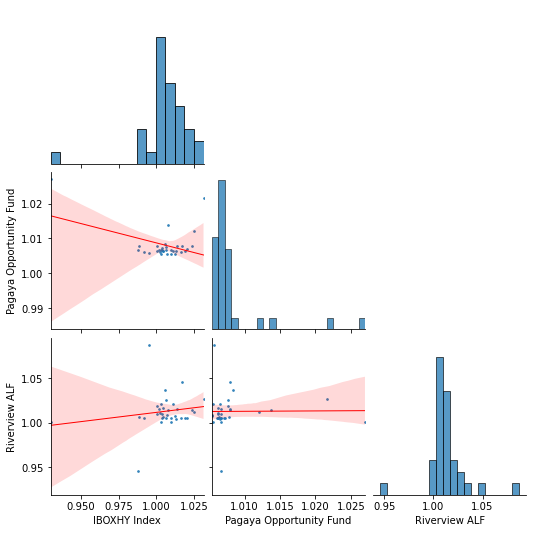

In [144]:
sns.pairplot(data=df_sub.iloc[:,3:],kind="reg",plot_kws={'line_kws':{'color':'red','lw':1},'scatter_kws': {'s': 3}},corner= True)
plt.savefig('fig_pairplot.png')


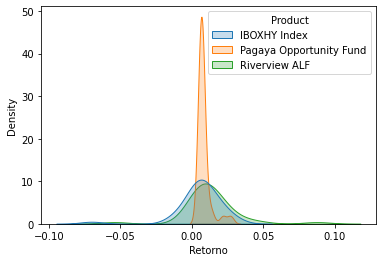

In [145]:
sns.kdeplot(data=df.reset_index(),x = 'Retorno',hue = 'Product',fill=True)
plt.savefig('retorno_density_distribution.png')

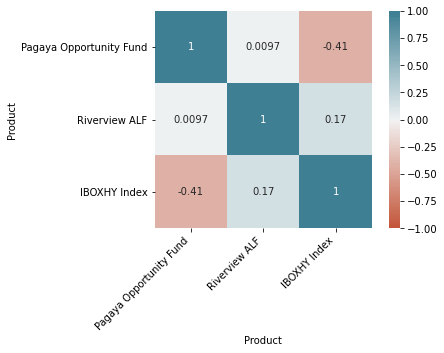

In [146]:
col_fundos1 =col_fundos
col_fundos1.append(nome_benchmark)
corr = df_sub[col_fundos].corr()
ax = sns.heatmap(
    corr,
    annot=True, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.savefig('CorrelationMatrix.png')

In [43]:
#Descritivas anuais
df_anuais = df.groupby(['Ano','Product']).agg({"Retorno": ['count','max','min','mean',vol_anualizada] ,"Retorno_1" : ['prod',lambda x: retorno_anualizado(x,tempo)]}).unstack().T.reset_index().iloc[: , 1:]
df_anuais

Ano,level_1,Product,2018,2019,2020,2021
0,count,IBOXHY Index,4.000000,12.000000,12.000000,5.000000
1,count,Pagaya Opportunity Fund,4.000000,12.000000,12.000000,5.000000
2,count,Riverview ALF,4.000000,12.000000,12.000000,5.000000
3,max,IBOXHY Index,0.020459,0.019169,0.031081,0.010743
4,max,Pagaya Opportunity Fund,0.007800,0.007700,0.027000,0.007600
5,max,Riverview ALF,0.006093,0.018658,0.046159,0.087546
6,min,IBOXHY Index,-0.011240,0.000463,-0.069926,-0.004604
7,min,Pagaya Opportunity Fund,0.006200,0.005400,0.006200,0.005600
8,min,Riverview ALF,0.001200,0.004760,-0.053938,0.000689
9,mean,IBOXHY Index,0.001007,0.008052,0.004095,0.004903


In [80]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('book.xlsx', engine='xlsxwriter')
workbook = writer.book
worksheet = workbook.add_worksheet('Relatorio')
df_sub.to_excel(writer,sheet_name = 'UnstackRetornosPercentuais')
df.to_excel(writer, sheet_name='StackRetornos1')

options = {
    'width': 256,
    'height': 100,
    'x_offset': 10,
    'y_offset': 10,

    'font': {'color': 'white',
             'size': 20},
    'align': {'vertical': 'middle',
              'horizontal': 'center'
              },
    'gradient': {'colors': ['#3E9EBC',
                            '#2F778D',
                            ]},
}

options2 = {
    'width': 200,
    'height': 20,
    'x_offset': 10,
    'y_offset': 10,

    'font': {'color': 'white',
             'size': 10},
    'align': {'vertical': 'middle',
              'horizontal': 'center'
              },
    'gradient': {'colors': ['#800000',
                            '#800000',
                            ]},
}
options3 = {
    'width': 200,
    'height': 20,
    'x_offset': 10,
    'y_offset': 10,

    'font': {'color': 'white',
             'size': 10},
    'align': {'vertical': 'middle',
              'horizontal': 'center'
              },
    'gradient': {'colors': ['#3E9EBC',
                            '#2F778D',
                            ]},
}
worksheet.insert_textbox('B2', 'Relatório Estatístico',options)


writer.sheets['Relatorio'] = worksheet
spread_names = [s for s in df_concat.columns[3:] if 'spread' in s]
#Tabela de retornos coloridos
worksheet.insert_textbox('B8', 'Retorno do fundo - Retorno do benchmarck',options2)
table_size = len(df.Ano.unique()) + 4

for i in range(len(df_concat.columns[3:])):
    function_retorno(df_concat,i,const).to_excel(writer,sheet_name = 'Relatorio',float_format="%.4f",startrow=(8 + table_size*i), startcol=0,index_label='Retorno')
    if df_concat.columns[3:][i] in spread_names:
        worksheet.insert_textbox('B'+ str((8 + table_size*i)), 'Spread do Retorno',options2)
    else:    
        worksheet.insert_textbox('B'+ str((8 + table_size*i)), 'Retorno',options3)
    
#Graficos
i = 2*table_size+table_size*i
worksheet.insert_image('A'+ str(i),'fig_pairplot.png')
worksheet.insert_image('O'+ str(i),'retorno_density_distribution.png')
worksheet.insert_image('O'+ str(i+20) ,'CorrelationMatrix.png')    

#Tabelas com os resultados
df_univar.to_excel(writer, sheet_name='Relatorio',float_format="%.2f",startrow=8,startcol = 15)
df_bivar.to_excel(writer, sheet_name='Relatorio',float_format="%.2f",startcol=15,startrow = (8+ len(df_univar)+2))
df_anuais.to_excel(writer, sheet_name='Anuais',float_format="%.2f")  
#Formata tamanho da coluna
writer.sheets['Relatorio'].set_column(15, 18, 20)
writer.sheets['Relatorio'].set_column(0, 0, 20)
writer.save()

In [ ]:
#Descritivas mensais

#df[['Retorno','MesAno','Product']].groupby(['MesAno','Product']).describe().unstack()


In [79]:
df_concat

Product,data,Ano,Mes,IBOXHY Index,Pagaya Opportunity Fund,Riverview ALF,Pagaya Opportunity Fund_spread,Riverview ALF_spread
0,2018-09-28,2018,9,1.003239,1.0066,1.001200,1.003350,0.997968
1,2018-10-31,2018,10,0.988760,1.0078,1.006093,1.019257,1.017530
2,2018-11-30,2018,11,0.991570,1.0062,1.005559,1.014754,1.014108
3,2018-12-31,2018,12,1.020459,1.0071,1.005331,0.986909,0.985176
4,2019-01-31,2019,1,1.016204,1.0061,1.005008,0.990057,0.988983
5,2019-02-28,2019,2,1.009579,1.0066,1.005961,0.997049,0.996416
6,2019-03-29,2019,3,1.012878,1.0065,1.004760,0.993703,0.991985
7,2019-04-30,2019,4,1.000463,1.0077,1.018658,1.007234,1.018187
8,2019-05-31,2019,5,1.012451,1.0054,1.007402,0.993036,0.995014
9,2019-06-28,2019,6,1.004087,1.0063,1.016769,1.002204,1.012630


In [ ]:
#Calculo dos retornos mensais no diario
mensal = df[['Product','MesAno','Retorno_1']].groupby(['MesAno','Product']).agg(['prod']).unstack()#, 'min', 'max','std','count'

mensal.columns = mensal.columns.droplevel(0).droplevel(0)
mensal  = mensal.reset_index()
mensal[['ibov','paiva']] = mensal[['ibov','paiva']]*100 -100
mensal

In [ ]:
df

In [ ]:
#Media Simples
{'paiva': mensal.paiva.mean(),'ibov': mensal.ibov.mean()}

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
mensal.select_dtypes(include=numerics).columns
for i in mensal.select_dtypes(include=numerics).columns:
    sns.kdeplot(mensal[i], label=i, shade=True)

plt.title('')
plt.xlabel('')
plt.legend()
plt.show()

In [ ]:
anual = df.groupby(['Product','Ano'])[['Product','Ano','Retorno']].agg(['mean', 'count', 'std']).Retorno

ci95_hi = []
ci95_lo = []

for i in anual.index:
    m, c, s = anual.loc[i]
    ci95_hi.append(m + 1.95*s/math.sqrt(c))
    ci95_lo.append(m - 1.95*s/math.sqrt(c))

anual['ci95_hi'] = ci95_hi
anual['ci95_lo'] = ci95_lo
print(anual)

In [ ]:

#some example data
x= np.linspace(0.1, 9.9, 20)
y = 3.0 * x
#some confidence interval
ci = 1.96 * np.std(y)/np.mean(y)

fig, ax = plt.subplots()
ax.plot(x,y)
ax.fill_between(x, (y-ci), (y+ci), color='b', alpha=.1)

In [ ]:
#some confidence interval
x=1
z=mean_confidence_interval(mensal.ibov,confidence=0.95)

fig, ax = plt.subplots()
ax.plot(x,z[0])
ax.fill_between(z[0], z[1], z[2], color='b', alpha=.1)

In [ ]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, (m-h), (m+h)

mean_confidence_interval(mensal.ibov,confidence=0.95)

In [ ]:
mean_confidence_interval(mensal.paiva,confidence=0.95)


In [ ]:
df.Product.unique()

In [ ]:
df[['Retorno','Product']]

In [ ]:
df[(df.Product == 'IHFAIHFA Index') | (df.Product == 'IBX Index') ]

In [ ]:
sns.kdeplot(data=df[(df.Product == 'IFMMIFMM Index') | (df.Product == 'NORONHM BZ Equity')],x = 'Retorno',hue = 'Product',fill=True)

In [ ]:
sns.kdeplot(data=df[(df.Product == 'IHFAIHFA Index') | (df.Product == 'NORONHM BZ Equity')],x = 'Retorno',hue = 'Product',fill=True)